# UFAL - Instituto da Computação
## Processamento digital de Imagens - 2022.2
## Aluna: Letícia Gabriela Cena de Lima

In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [29]:
img = cv.cvtColor(cv.imread('./imagem.jpg'), cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

### questão 1

In [34]:
f = np.fft.fft2(img_gray)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

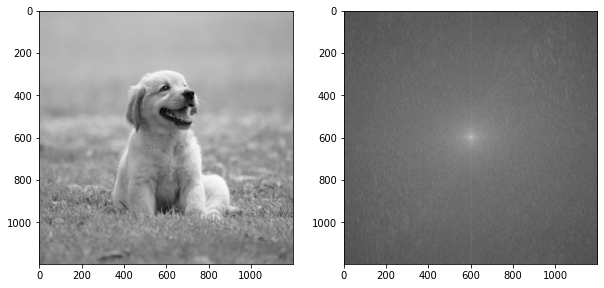

In [47]:
plt.figure(figsize=(10,10))
plt.subplot(121),plt.imshow(img_gray, cmap='gray')
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap='gray')
plt.show()

### questão 2

In [44]:
magnitude = np.abs(f)
sem_fftshift = np.log(1+np.abs(f))
com_fftshift = np.log(1+np.abs(fshift))
real = np.real(f)
imag = np.imag(f)

Text(0.5, 1.0, 'Magnitude do espectro')

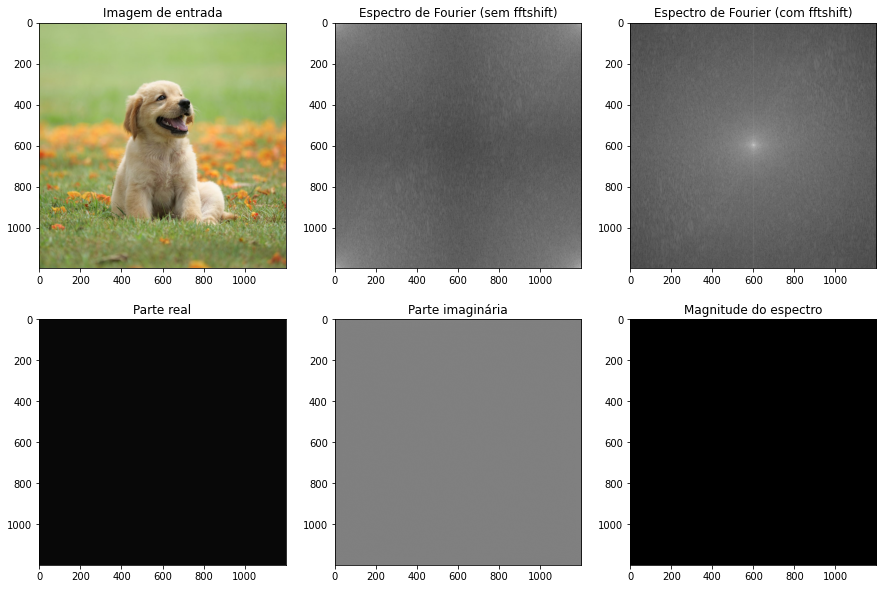

In [46]:
plt.figure(figsize=(15,10))
plt.subplot(231), plt.imshow(img, cmap='gray')
plt.title('Imagem de entrada')

plt.subplot(232), plt.imshow(sem_fftshift, cmap='gray')
plt.title('Espectro de Fourier (sem fftshift)')

plt.subplot(233), plt.imshow(com_fftshift, cmap='gray')
plt.title('Espectro de Fourier (com fftshift)')

plt.subplot(234), plt.imshow(real, cmap='gray')
plt.title('Parte real')

plt.subplot(235), plt.imshow(imag, cmap='gray')
plt.title('Parte imaginária')

plt.subplot(236), plt.imshow(magnitude, cmap='gray')
plt.title('Magnitude do espectro')

### questão 3

In [64]:
magnitude_spec = np.log(1+np.abs(fshift))
min = np.min(magnitude_spec)
max = np.max(magnitude_spec)

# normalizar 
magnitude_spec_norm = (magnitude_spec - min) *255 / (max - min)
min2 = np.min(magnitude_spec_norm)
max2 = np.max(magnitude_spec_norm)

scaled = 255*(magnitude_spec_norm - min2) / (max2 - min2)

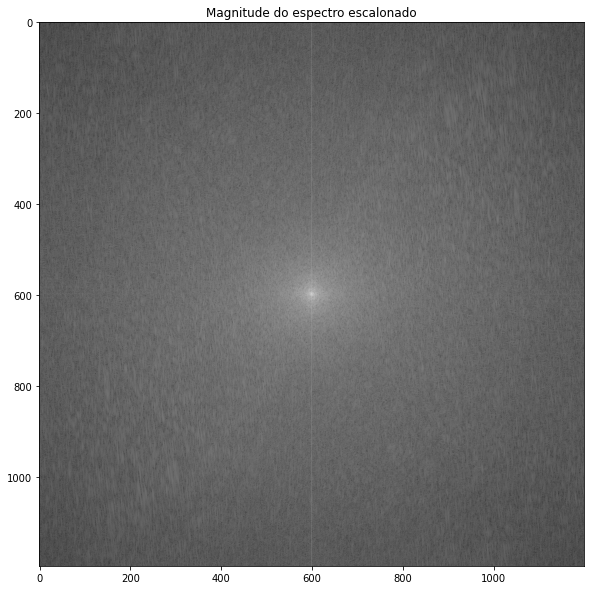

In [63]:
plt.figure(figsize=(10,10))
plt.imshow(scaled, cmap='gray'), plt.title('Magnitude do espectro escalonado')
plt.show()

### questão 4

In [68]:
m, n, a = img.shape

fc = 20 # frquencia de corte
H = np.zeros((m, n))
for i in range(m):
  for j in range(n):
    D = np.sqrt((i-m//2)**2 + (j-n//2)**2)
    if D <= fc:
      H[i,j] = 1


G = fshift * H #aplicando o filtro
Gshift = np.fft.ifftshift(G)
img_filtered = np.fft.ifft2(Gshift)
img_real = np.real(img_filtered)

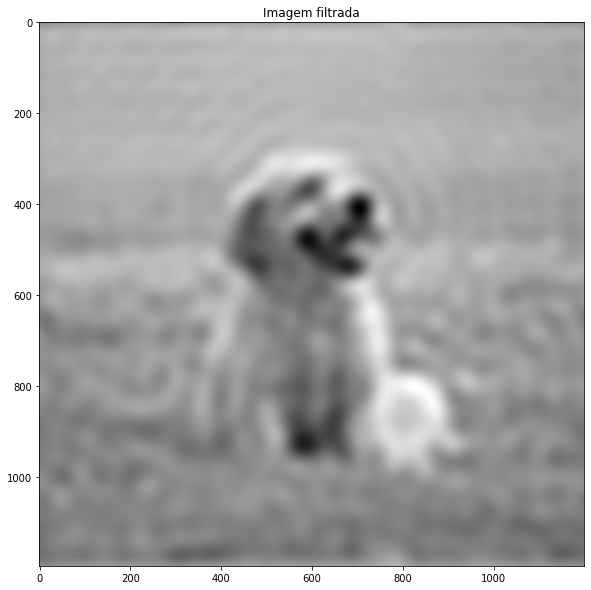

In [72]:
plt.figure(figsize=(10,10))
plt.imshow(img_real, cmap='gray'), plt.title('Imagem filtrada')
plt.show()

### questão 5

In [73]:
m, n, a = img.shape

fc = 20 # frquencia de corte
H = np.ones((m, n))
for i in range(m):
  for j in range(n):
    D = np.sqrt((i-m//2)**2 + (j-n//2)**2)
    if D <= fc:
      H[i,j] = 0


G = fshift * H #aplicando o filtro
Gshift = np.fft.ifftshift(G)
img_filtered = np.fft.ifft2(Gshift)
img_real = np.real(img_filtered)

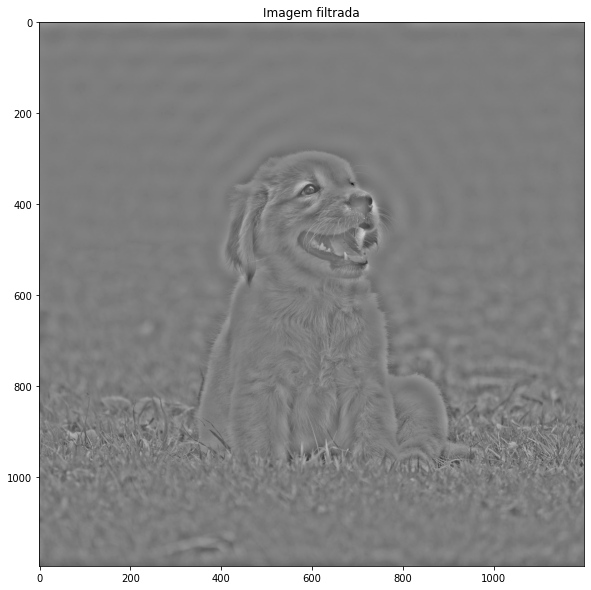

In [74]:
plt.figure(figsize=(10,10))
plt.imshow(img_real, cmap='gray'), plt.title('Imagem filtrada')
plt.show()